# Model Card for Airbus Ship Dataset

In [ ]:
!pip install --upgrade pip==21.3
!pip install -U seaborn scikit-learn model-card-toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 4.2 MB/s             
     |████████████████████████████████| 1.8 MB 22.8 MB/s            
     |████████████████████████████████| 126 kB 82.9 MB/s            
     |████████████████████████████████| 48 kB 5.5 MB/s             
     |████████████████████████████████| 56 kB 5.2 MB/s             
     |████████████████████████████████| 6.6 MB 29.3 MB/s            
     |████████████████████████████████| 2.4 MB 48.2 MB/s            
     |████████████████████████████████| 133 kB 55.8 MB/s            
     |████████████████████████████████| 129 kB 57.7 M

Restart the runtime.

In [ ]:
import model_card_toolkit as mctlib
from io import BytesIO
from IPython import display
import base64
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageDraw, ExifTags
import os
from datetime import date

In [ ]:
#read csv
train = pd.read_csv('train_ship_segmentations_v2.csv')
train.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...


In [ ]:
# dataset info
ships = train[~train.EncodedPixels.isna()].ImageId.unique()
noships = train[train.EncodedPixels.isna()].ImageId.unique()

n_images_noships = ships.shape[0]
n_images_ships = noships.shape[0]
print("Total records in the train set: " , train.shape[0])
print("No. of images with no ships: ", n_images_noships)
print("No. of images with ships: ", n_images_ships)

Total records in the train set:  231723
No. of images with no ships:  42556
No. of images with ships:  150000


In [ ]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

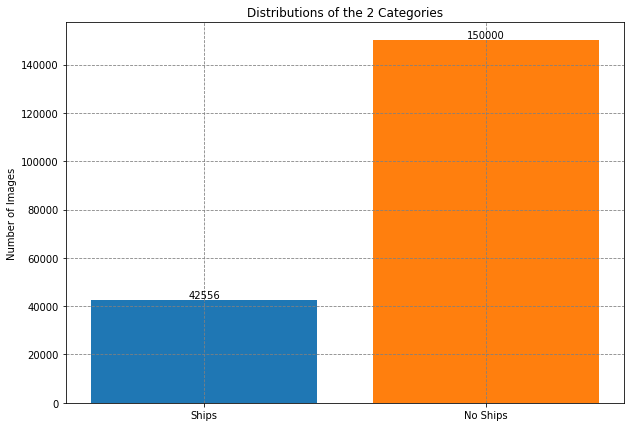

In [ ]:
# plot in bar chart
plt.figure(figsize = (10, 7))
plt.grid(color = 'gray', linestyle = 'dashed')
plt.bar(['Ships', 'No Ships'], [len(ships), len(noships)], color = sns.color_palette());
for a,b in zip(['Ships', 'No Ships'],[len(ships), len(noships)]):
    plt.text(a, b + 0.5, '%.0f' % b, ha = 'center', va = 'bottom',fontsize = 10)
plt.title("Distributions of the 2 Categories")
plt.ylabel('Number of Images')
data_distributions = plot_to_str()
plt.show()

## Create a model card
### Initialize toolkit and model card

In [ ]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

In [ ]:
model_card.model_details.name = 'Airbus Ship Detection Dataset'
model_card.model_details.overview = (
    'This dataset contains 42556 images with no ships and 150000 images with ship(s),'
    ' the size of all the image is 768x768, all images are in JPEG format.'
    ' Many images may contain multiple ships.'
    ' Ships within and across images may differ in size (sometimes significantly) and be located in open sea, at docks, marinas, etc.')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Team 1 in Summer2022 DAMG 7245 Course', contact='jiang.zif@northeastern.edu,adina.n@northeastern.edu')
]
model_card.model_details.references = [
    mctlib.Reference(reference='https://www.kaggle.com/competitions/airbus-ship-detection'),
    mctlib.Reference(reference='https://cloud.google.com/blog/products/ai-machine-learning/create-a-model-card-with-scikit-learn')
]
#model_card.model_details.version.name = str(uuid.uuid4())
model_card.model_details.version.date = str(date.today())

model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('While distinguishing between ships and noship is generally agreed to be a benign application of machine learning,' 
    ' harmful results can occur when the dataset contains images that only has lands.'),
    mitigation_strategy='Avoid using images only contains land area.'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Ship detection')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Ship detection')]
model_card.considerations.users = [mctlib.User(description='Military/Navy'), mctlib.User(description='ML researchers'), 
                                   mctlib.User(description='Sea rescue team'), 
                                   mctlib.User(description='environmental protection agencies'),
                                   mctlib.User(description='national government authorities')]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = (
  f'{len(train)} rows with {len(train.columns)} features')
model_card.model_parameters.data[0].graphics.collection = [
    mctlib.Graphic(image=data_distributions)
]

mct.update_model_card(model_card)

In [ ]:
# Return the model card document as an HTML page

html = mct.export_format()

display.display(display.HTML(html))